**Задание**

**1.** Опишите - какой результата получен в нейросети в зависимости от:
- числа нейронов в слое(для 2-хслойной сети)
- числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров)
- фиксируйте для тренировочного и тестового набора метрики accuracy.

**2.** Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей
Фиксируйте для тренировочного и тестового набора метрики accuracy.

**3.** Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

**4.** Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# class_names = ['T-shirt/top',
#                'Trouser',
#                'Pullover',
#                'Dress',
#                'Coat',
#                'Sandal',
#                'Shirt',
#                'Sneaker',
#                'Bag',
#                'Ankle boot']

In [4]:
# Нормализация

train_images = train_images / 255.0

test_images = test_images / 255.0

**1.1 Число нейронов**

In [5]:
def neuron_quant(n_quant):
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(n_quant, activation='relu'),
    keras.layers.Dense(10)
    ])
    
    model.compile(optimizer='rmsprop',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    n = model.fit(train_images, train_labels, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)
    
    return n

In [6]:
def visual(n1, n2, n3):
    plt.figure(figsize=(9,9))
    plt.plot(n1.history['accuracy'], label = 'accuracy 8 нейронов тренировка')
    plt.plot(n1.history['val_accuracy'], label = 'accuracy 8 нейронов валидация', linestyle = '--')
    plt.plot(n2.history['accuracy'], label = 'accuracy 64 нейронов тренировка')
    plt.plot(n2.history['val_accuracy'], label = 'accuracy 64 нейронов валидация', linestyle = '--')
    plt.plot(n3.history['accuracy'], label = 'accuracy 128 нейронов тренировка')
    plt.plot(n3.history['val_accuracy'], label = 'accuracy 128 нейронов валидация', linestyle = '--')

    plt.xlabel('эпох')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid('On')
    plt.title('Число нейронов')
    plt.show()

In [7]:
n1 = neuron_quant(8)
n2 = neuron_quant(64)
n3 = neuron_quant(128)

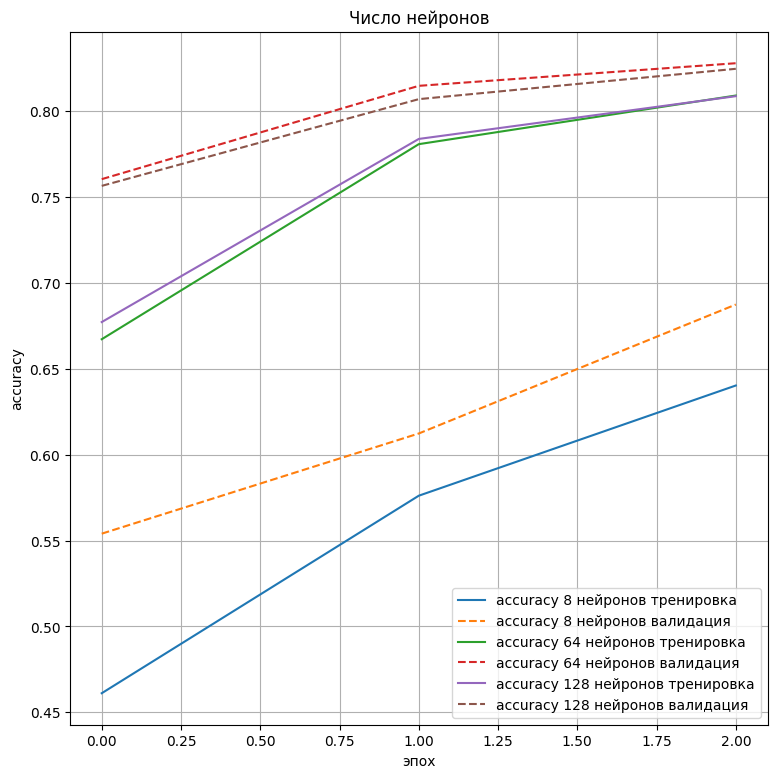

In [8]:
visual(n1, n2, n3)

**1.2. Число слоёв**

In [9]:
def layer_quant(l_quant):
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    
    for i in range(l_quant - 1):
        model.add(keras.layers.Dense(15, activation='relu'))
        
    model.add(keras.layers.Dense(10))
    
    model.compile(optimizer='rmsprop',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    n = model.fit(train_images, train_labels, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)
    
    return n

In [10]:
def visual(n1, n2, n3, n4):
    plt.figure(figsize=(9,9))
    plt.plot(n1.history['accuracy'], label = 'accuracy 2 слоя тренировка')
    plt.plot(n1.history['val_accuracy'], label = 'accuracy 2 слоя валидация', linestyle = '--')
    plt.plot(n2.history['accuracy'], label = 'accuracy 3 слоя тренировка')
    plt.plot(n2.history['val_accuracy'], label = 'accuracy 3 слоя валидация', linestyle = '--')
    plt.plot(n3.history['accuracy'], label = 'accuracy 5 слоев тренировка')
    plt.plot(n3.history['val_accuracy'], label = 'accuracy 5 слоев валидация', linestyle = '--')
    plt.plot(n4.history['accuracy'], label = 'accuracy 10 слоев тренировка')
    plt.plot(n4.history['val_accuracy'], label = 'accuracy 10 слоев валидация', linestyle = '--')


    plt.xlabel('эпох')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid('On')
    plt.title('Число слоёв')
    plt.show()

In [11]:
n1 = layer_quant(2)
n2 = layer_quant(3)
n3 = layer_quant(5)
n4 = layer_quant(10)

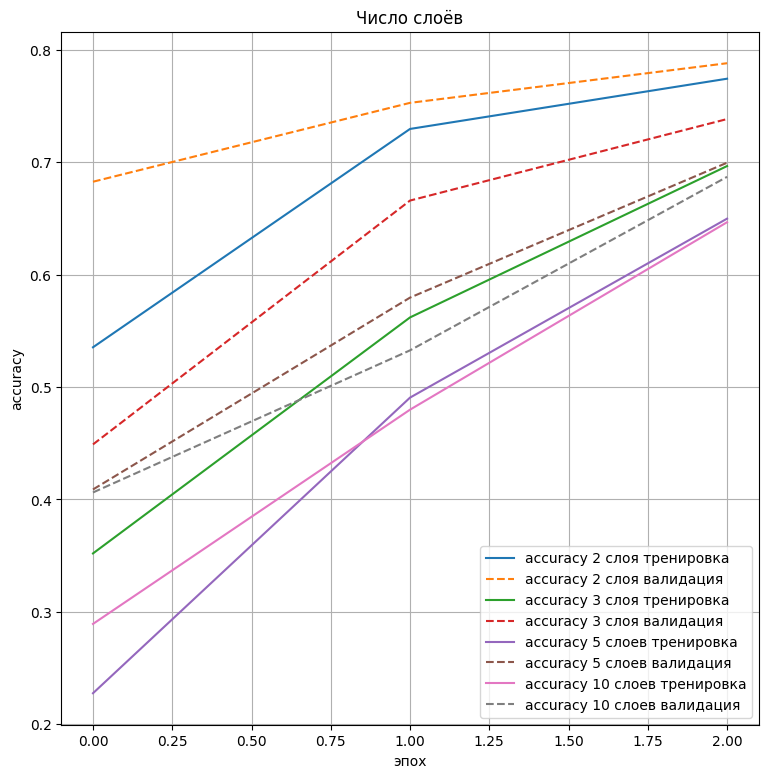

In [12]:
visual(n1, n2, n3, n4)

**2. Оптимизаторы (SGD, Adam, RMSProp)**

In [13]:
def optimizer(opt):
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10)
    ])
    
    model.compile(optimizer=opt,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    n = model.fit(train_images, train_labels, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)
    
    return n

In [14]:
def visual(n1, n2, n3):
    plt.figure(figsize=(9,9))
    plt.plot(n1.history['accuracy'], label = 'accuracy SGD тренировка')
    plt.plot(n1.history['val_accuracy'], label = 'accuracy SGD валидация', linestyle = '--')
    plt.plot(n2.history['accuracy'], label = 'accuracy adam тренировка')
    plt.plot(n2.history['val_accuracy'], label = 'accuracy adam валидация', linestyle = '--')
    plt.plot(n3.history['accuracy'], label = 'accuracy rmsprop тренировка')
    plt.plot(n3.history['val_accuracy'], label = 'accuracy rmsprop валидация', linestyle = '--')

    plt.xlabel('эпох')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid('On')
    plt.title('Оптимизаторы')
    plt.show()

In [15]:
n1 = optimizer('SGD')
n2 = optimizer('adam')
n3 = optimizer('rmsprop')

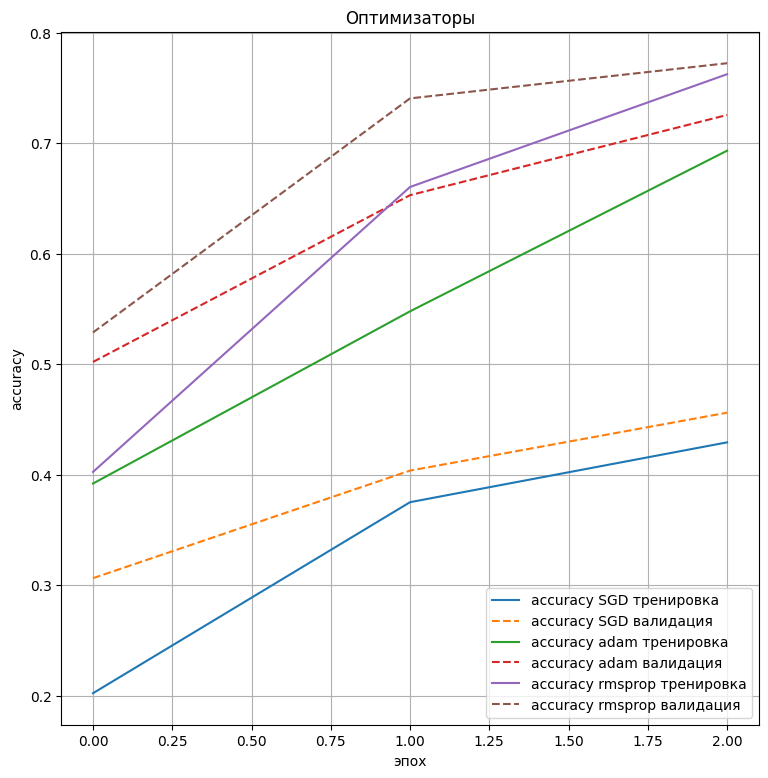

In [16]:
visual(n1, n2, n3)

**3. Вывод:**

Влияние на обучение нс на датасете fashion mnist:
1. Прямая зависимость от количества нейронов
2. Обратная зависимость от количества слоёв
3. Лучший оптимизатор - adam

**4. Матрица ошибок**

In [17]:
# Возьмём на примере adam

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10)
    ])
    
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    
n = model.fit(train_images, train_labels, epochs=3, batch_size=1024, validation_split=0.2, verbose=0)

predictions = model.predict(test_images, verbose=0)

In [18]:
to_nums = []
    
for el in predictions:
    to_nums.append(np.argmax(el))
        
print('REPORT\n\n' + classification_report(test_labels, to_nums))
print('CONFUSION MATRIX\n')
        
print(pd.crosstab(test_labels, to_nums))

REPORT

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1000
           1       0.96      0.92      0.94      1000
           2       0.64      0.67      0.65      1000
           3       0.76      0.79      0.77      1000
           4       0.65      0.67      0.66      1000
           5       0.92      0.70      0.80      1000
           6       0.50      0.40      0.44      1000
           7       0.79      0.89      0.84      1000
           8       0.90      0.87      0.89      1000
           9       0.83      0.91      0.87      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

CONFUSION MATRIX

col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0      807    4   20   80    9    0   64    0   16    0
1       22  918   14   33   10    0    1    0  